In [1]:
from cProfile import label

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import alpha

## Data Explore

In [14]:
df = pd.read_csv('models&data/alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [15]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [17]:
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [18]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2144    False
2145    False
2146    False
2147    False
2148    False
Length: 2149, dtype: bool

In [19]:
df = df.drop(columns=["PatientID","DoctorInCharge"])

## Class Comparison

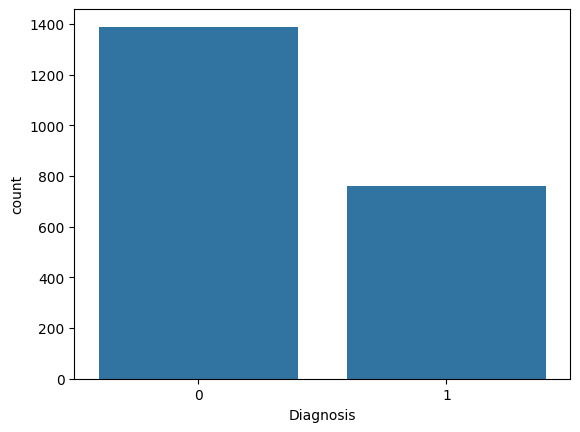

In [7]:
sns.countplot(x='Diagnosis',data=df)
plt.show()

In [11]:
Diagnosis = df.Diagnosis.value_counts()
print(Diagnosis)
print("Alzheimer Ratio: ",Diagnosis[1]/Diagnosis.sum())

Diagnosis
0    1389
1     760
Name: count, dtype: int64
Alzheimer Ratio:  0.35365286179618427


## Features Type

In [20]:
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

In [21]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

## Numerical Features Plots

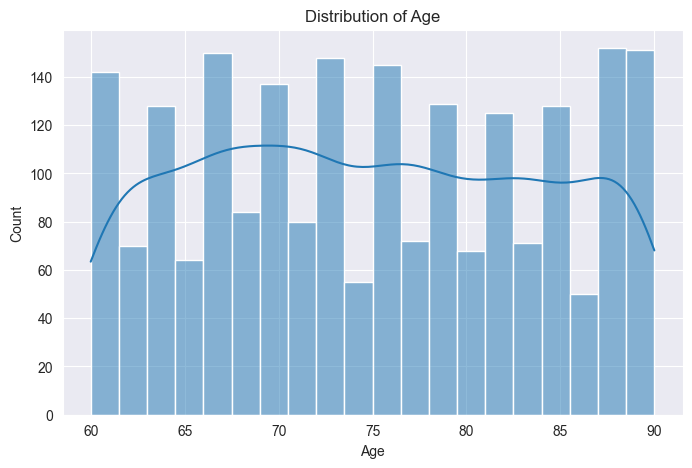

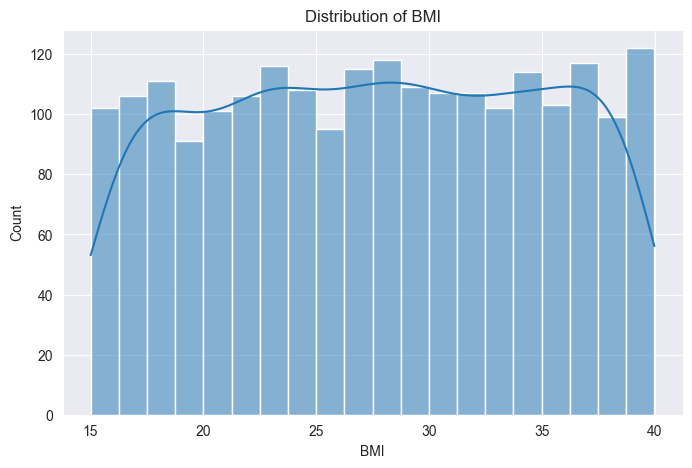

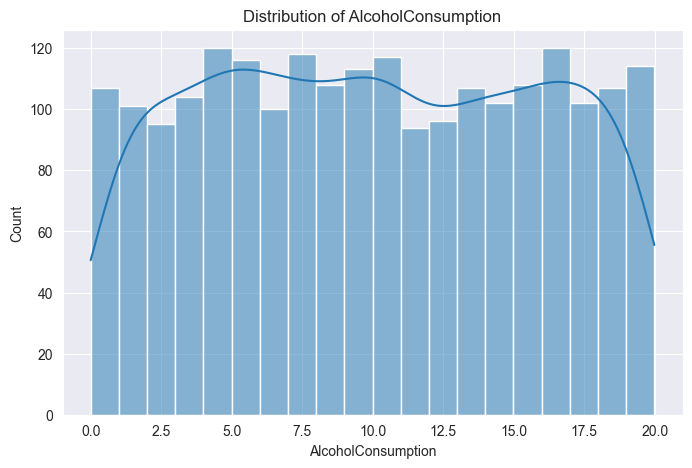

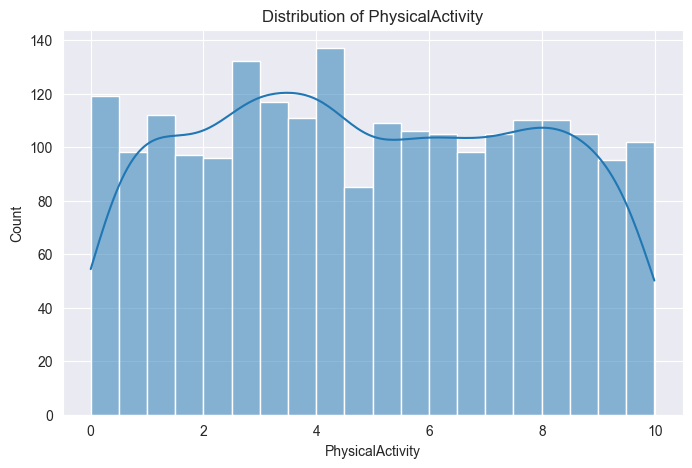

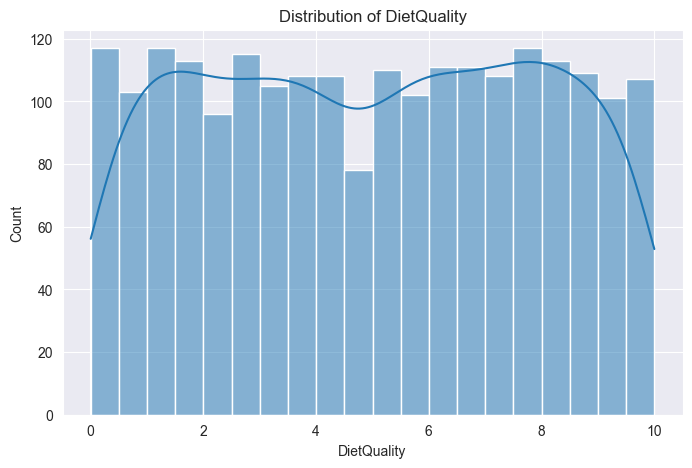

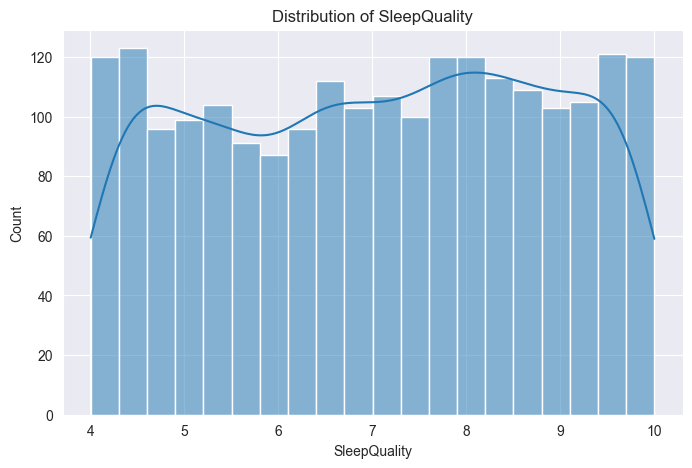

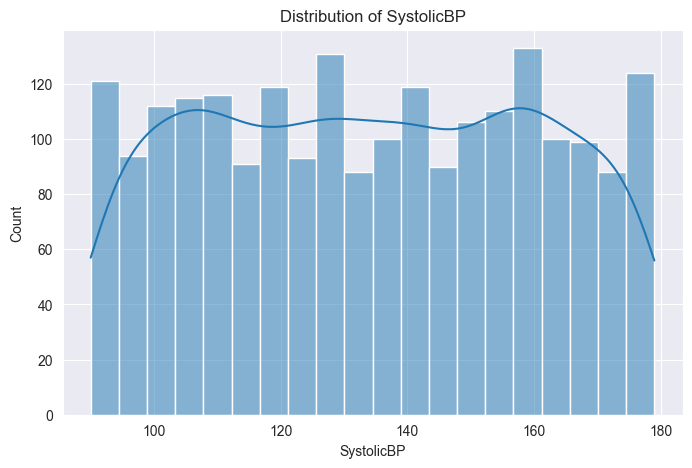

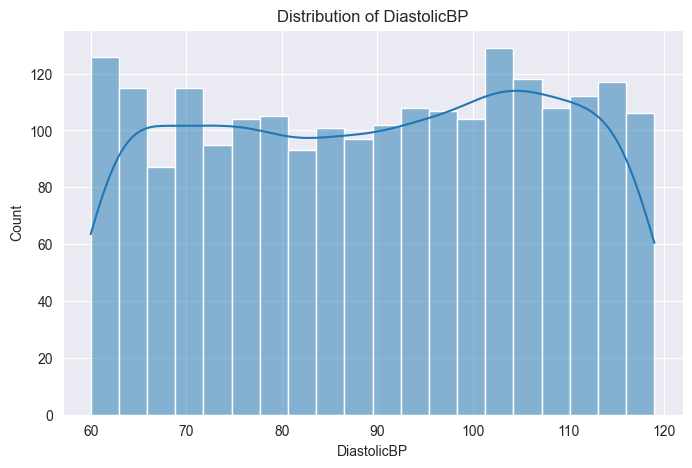

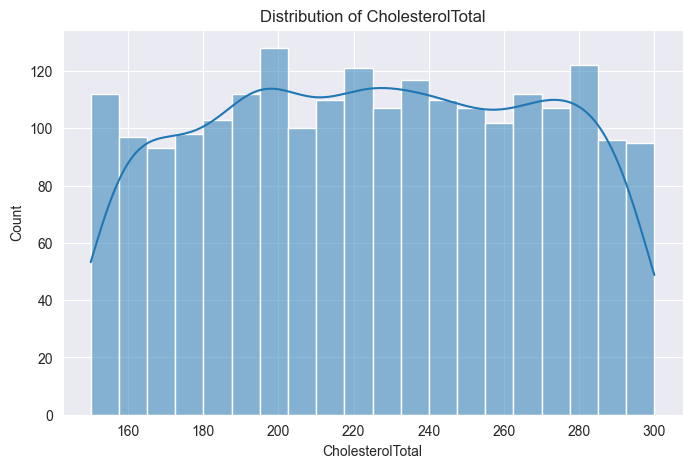

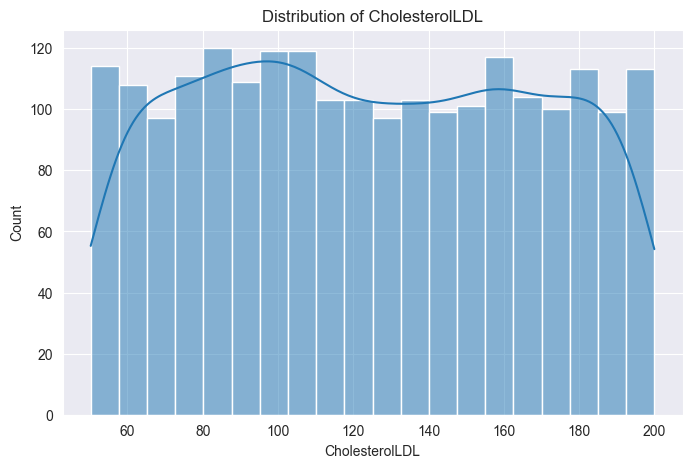

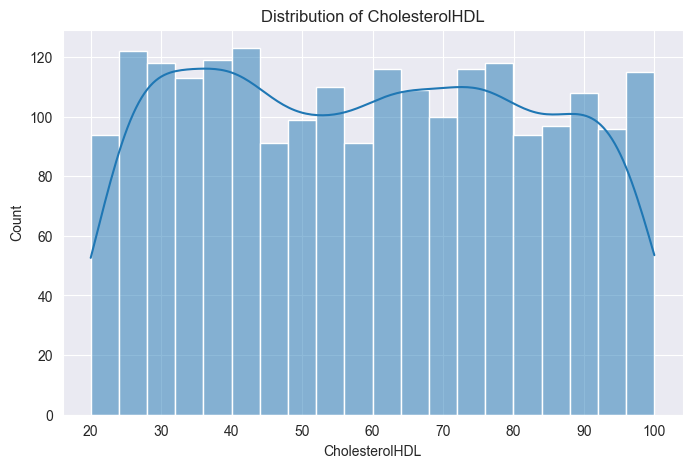

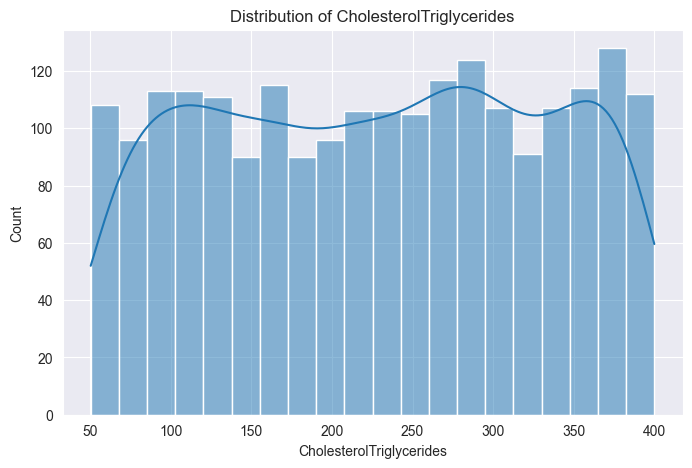

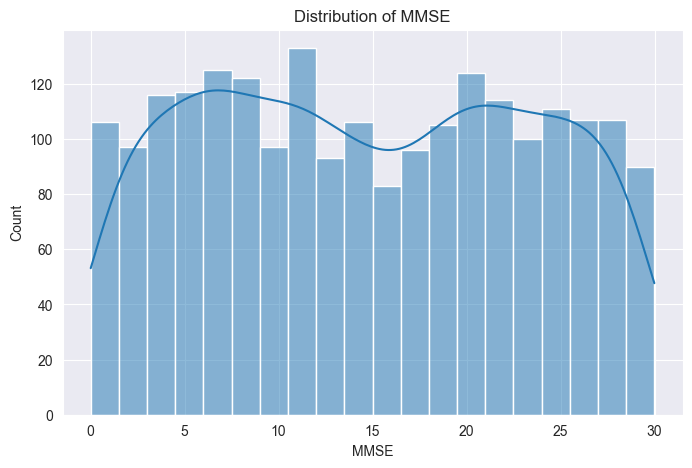

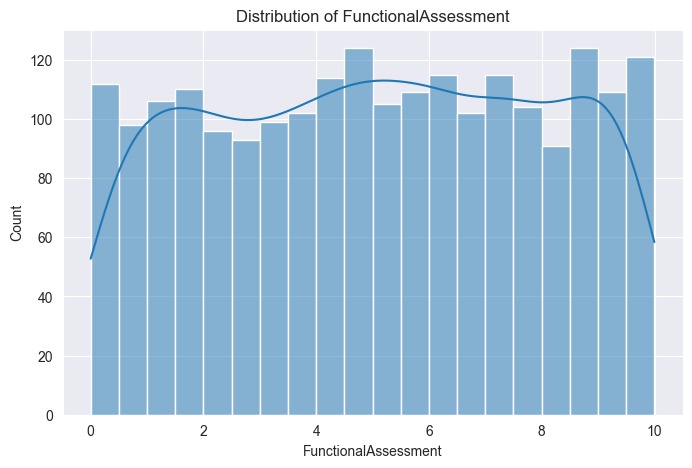

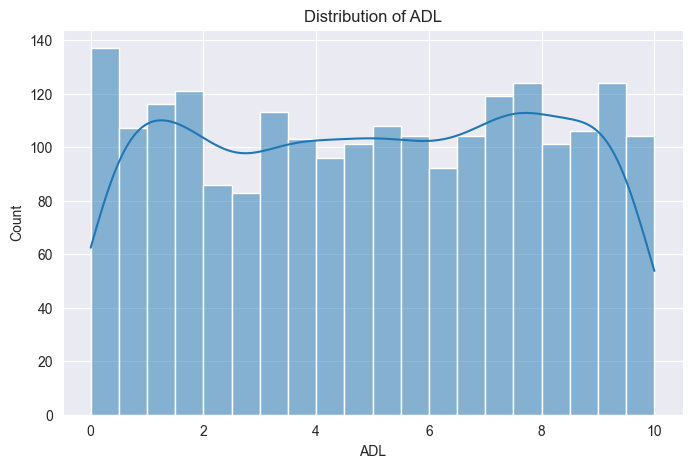

In [22]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

## Categorical Feature Plots

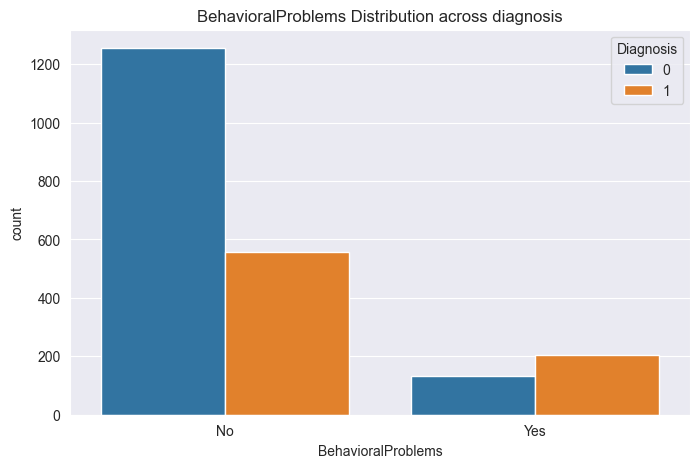

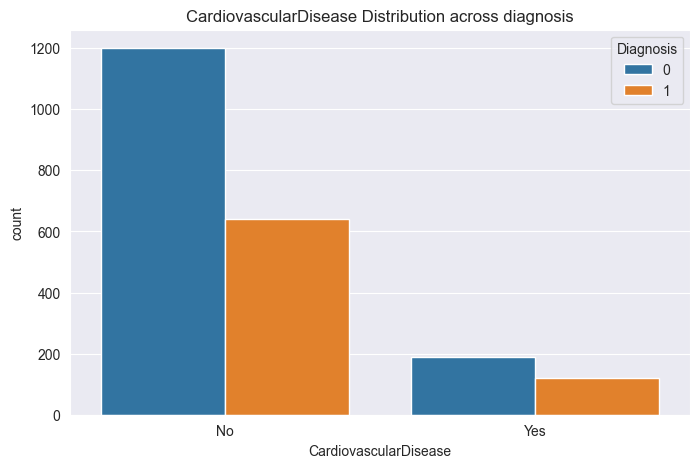

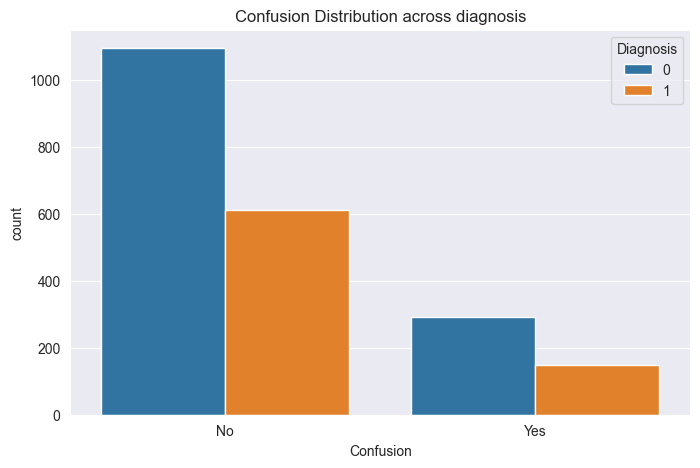

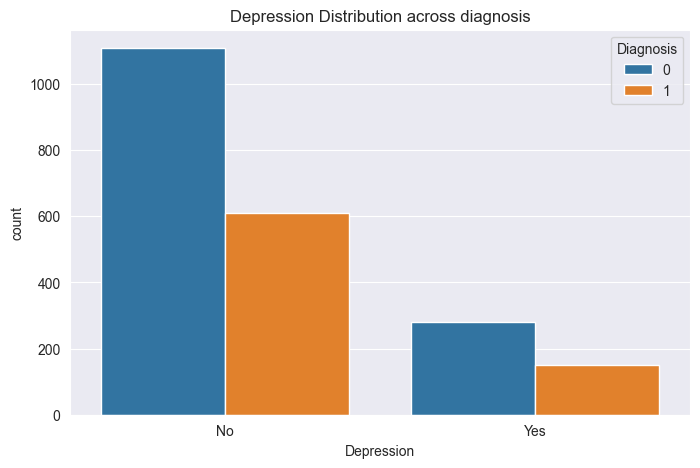

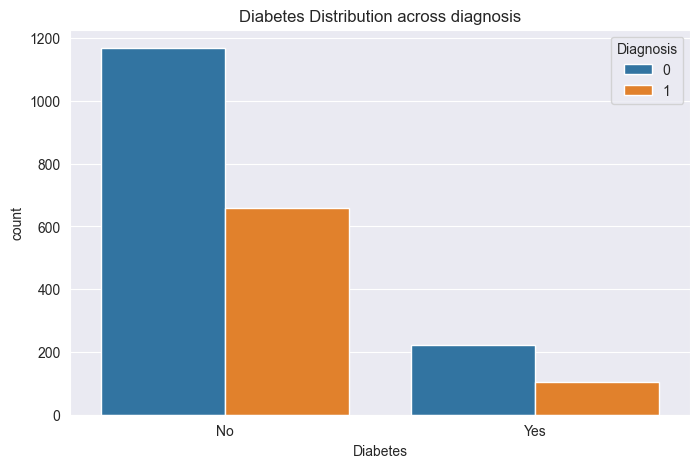

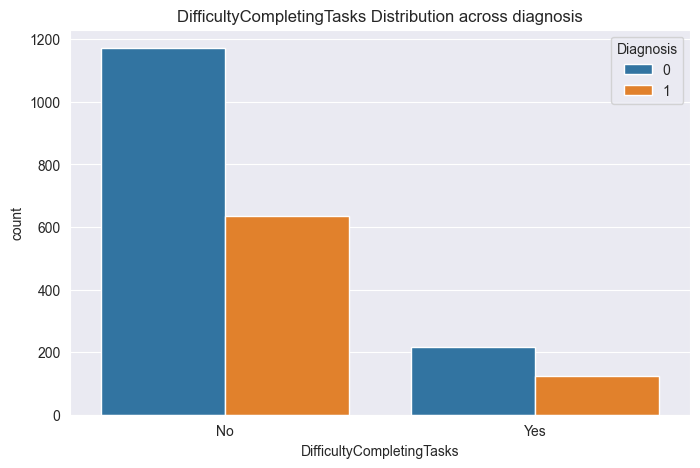

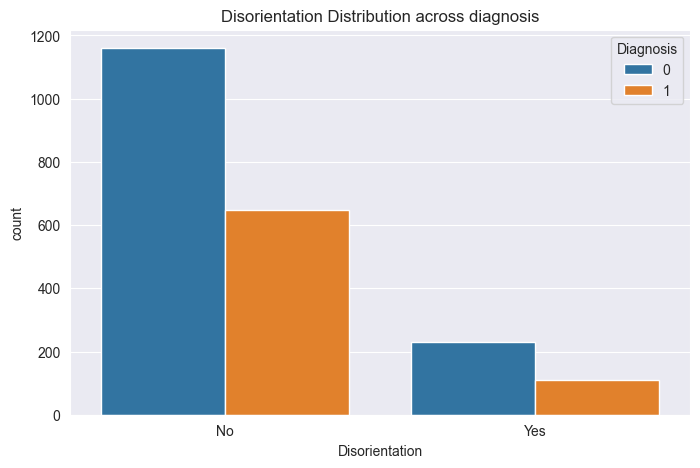

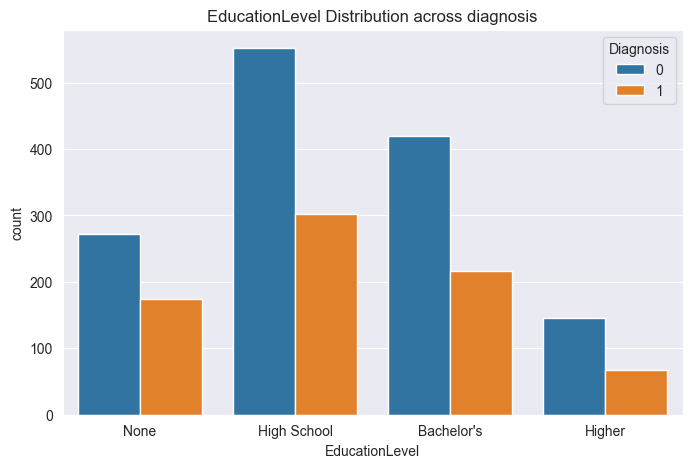

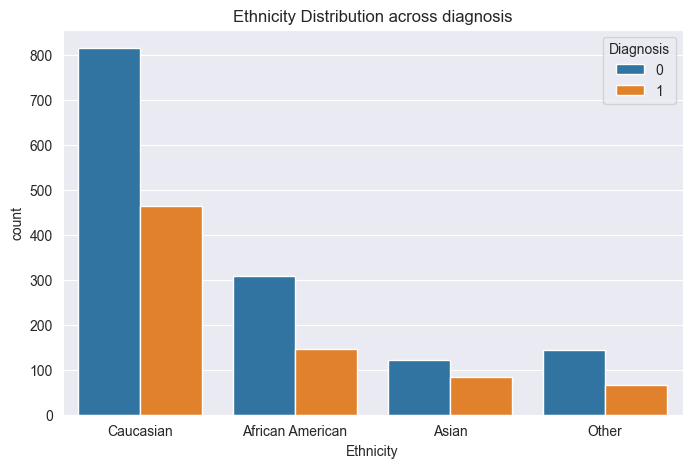

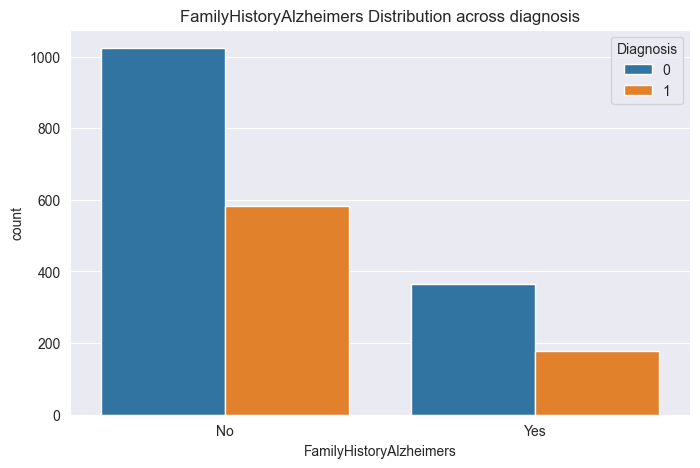

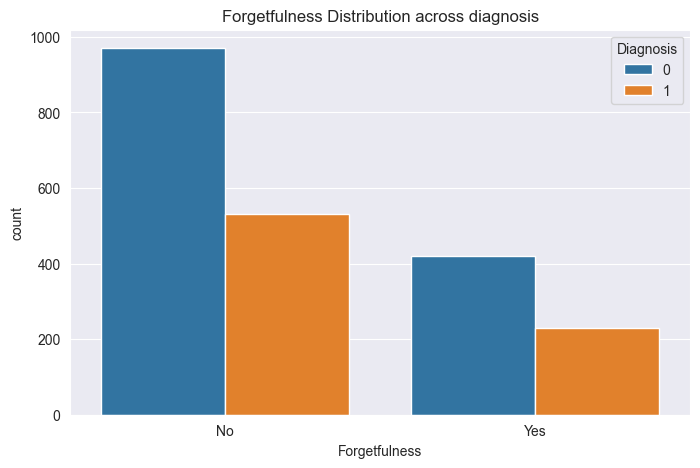

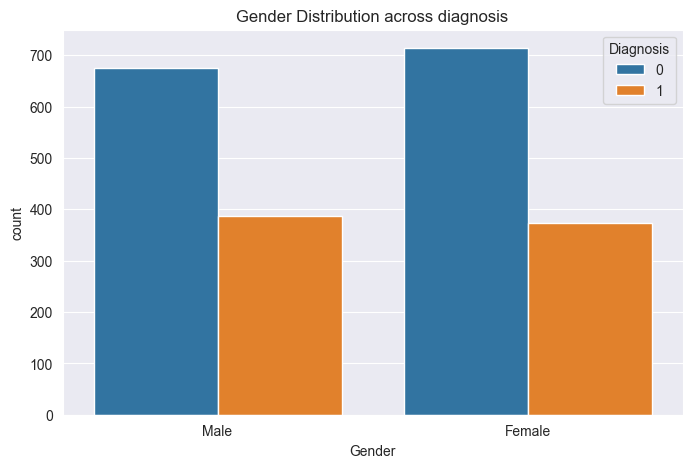

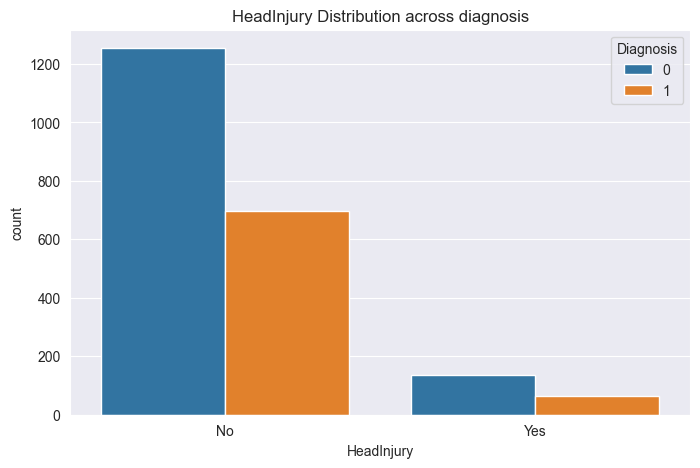

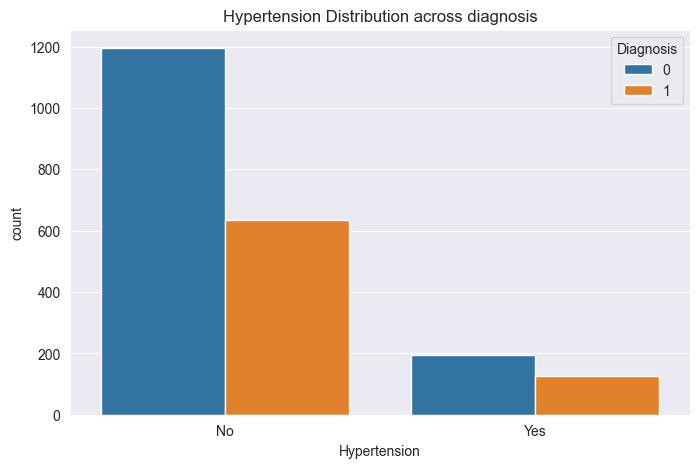

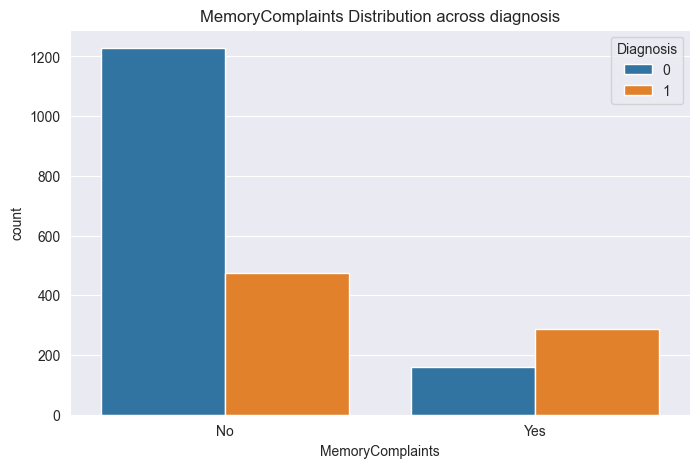

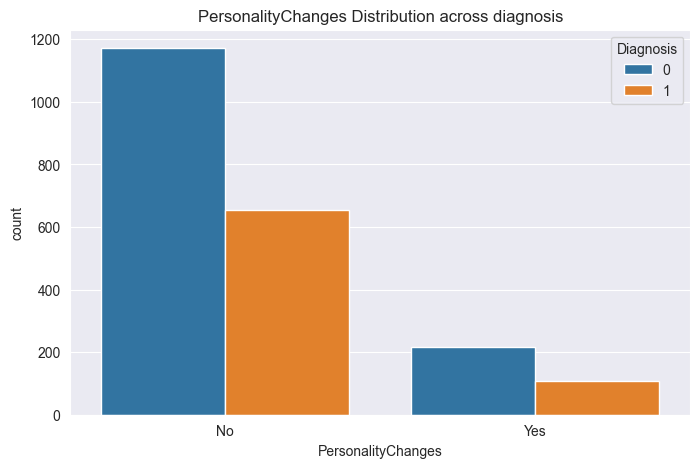

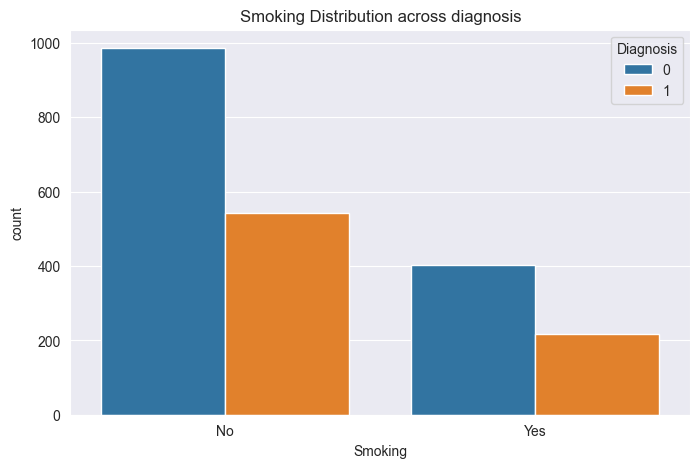

In [23]:
for col in categorical_columns:
    fig= plt.figure(figsize=(8,5))
    sns.countplot(data=df,x=col,hue='Diagnosis')
    plt.title(f"{col} Distribution across diagnosis")

    labels = custom_labels[col]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks,labels=labels)

    plt.show()

## Features Correlation

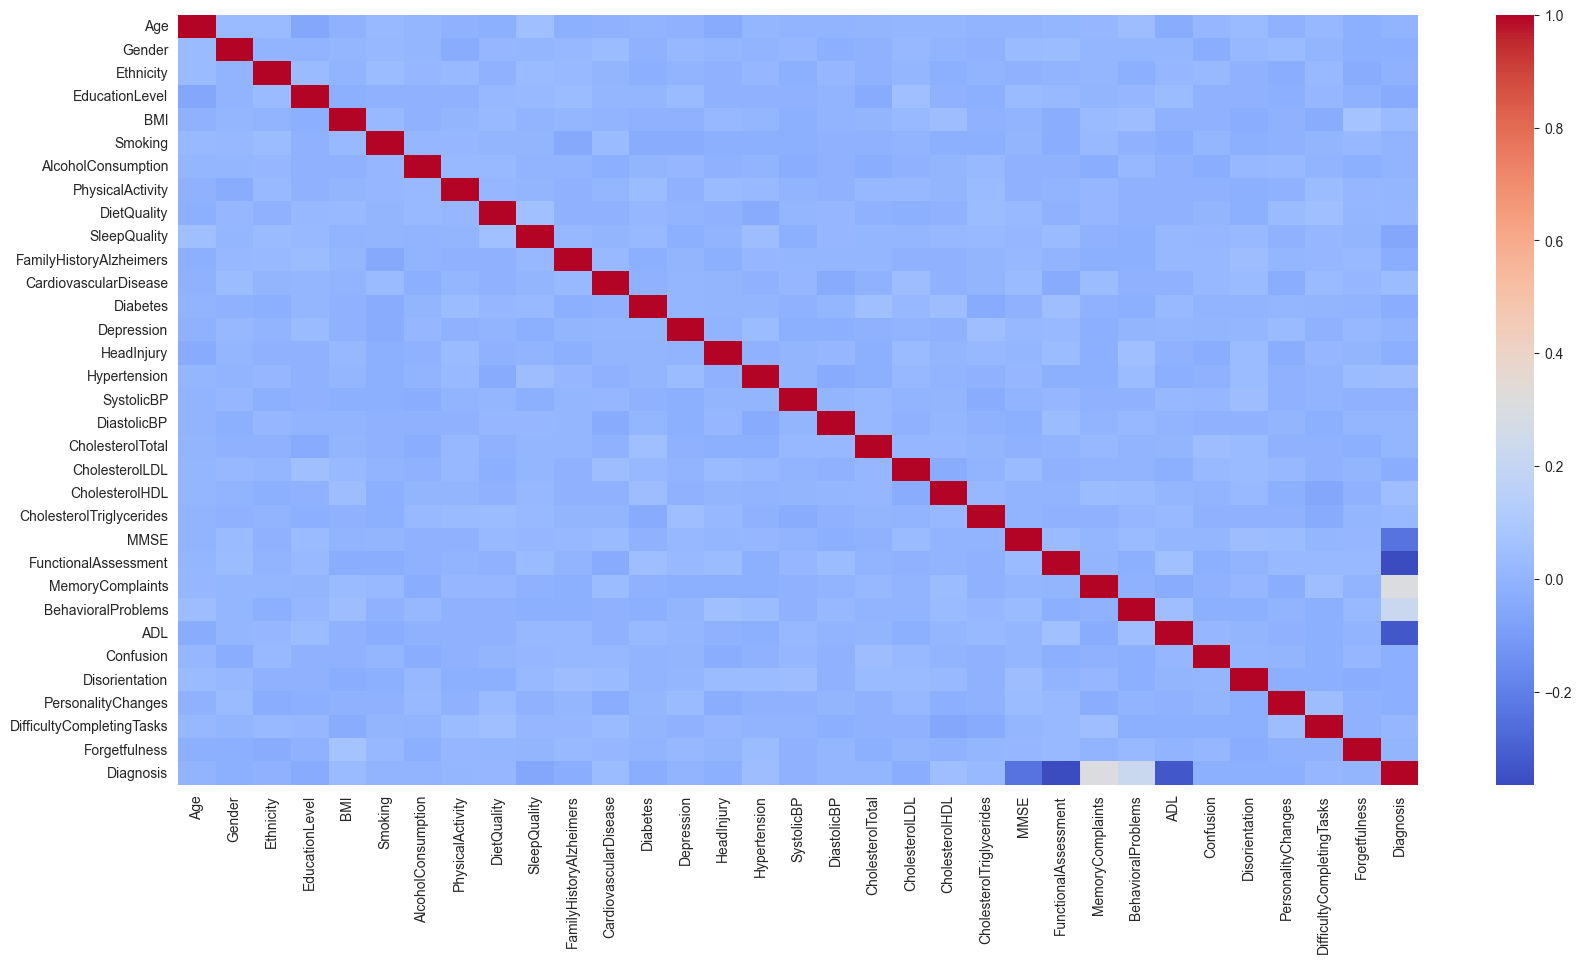

In [53]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),cmap="coolwarm")
plt.show()

#### Highest Correlation features distribution

In [32]:
high_corr_num_cols = df[['MMSE','ADL','FunctionalAssessment']]
high_corr_cat_cols = df[['MemoryComplaints','BehavioralProblems']]

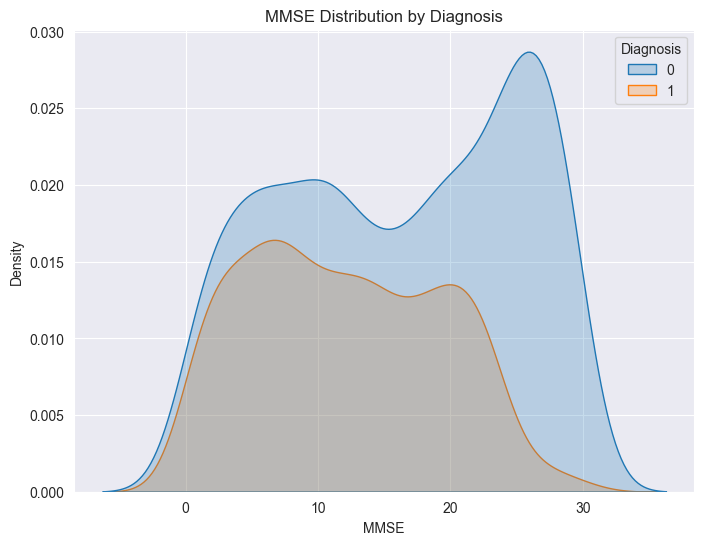

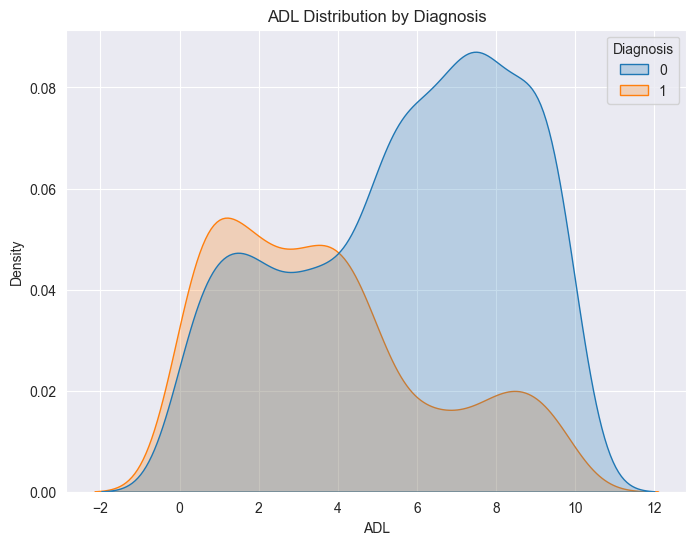

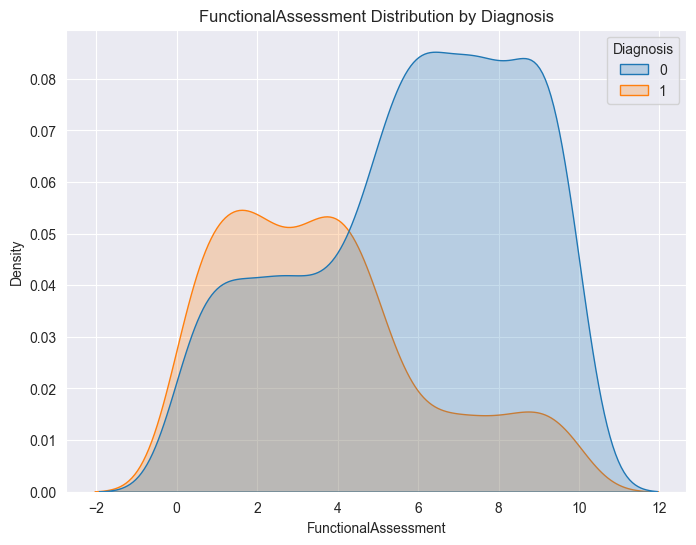

In [50]:
for col in high_corr_num_cols:
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=df,x=col,hue='Diagnosis',fill=True)
    plt.title(f'{col} Distribution by Diagnosis')
    plt.show()


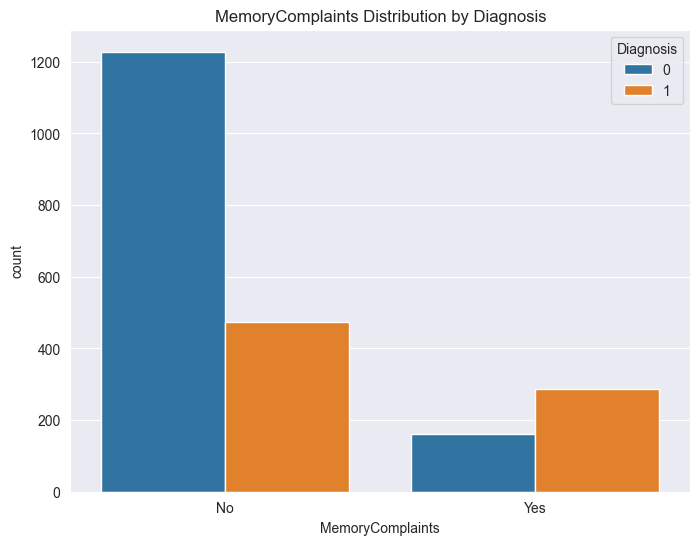

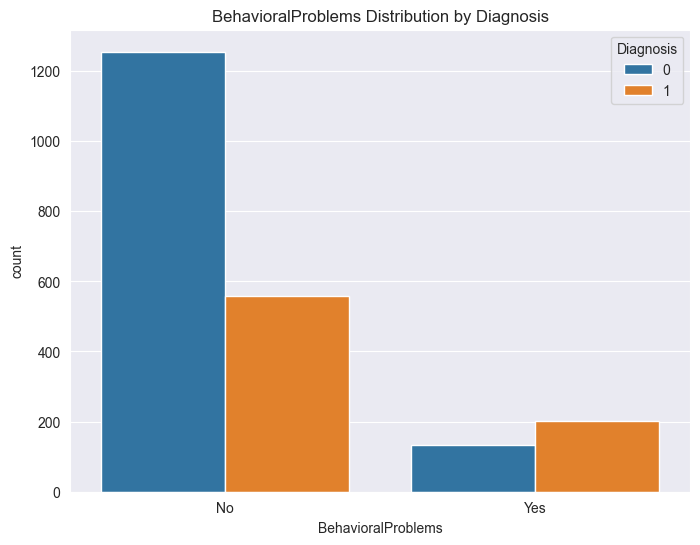

In [41]:
for col in high_corr_cat_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=col,hue='Diagnosis')
    plt.title(f'{col} Distribution by Diagnosis')
    labels = custom_labels[col]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks,labels=labels)
    plt.show()

## Outliers Detection

In [43]:
outlier_summary = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        "count": len(outliers),
        "percentage": 100 * len(outliers) / len(df),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }
print(pd.DataFrame(outlier_summary).T)

                          count  percentage  lower_bound  upper_bound
Age                         0.0         0.0    43.000000   107.000000
BMI                         0.0         0.0     3.223853    52.257332
AlcoholConsumption          0.0         0.0    -9.887372    30.185112
PhysicalActivity            0.0         0.0    -4.715282    14.713807
DietQuality                 0.0         0.0    -5.191800    15.208879
SleepQuality                0.0         0.0     0.863712    13.181807
SystolicBP                  0.0         0.0    44.500000   224.500000
DiastolicBP                 0.0         0.0    27.500000   151.500000
CholesterolTotal            0.0         0.0    82.584923   369.699697
CholesterolLDL              0.0         0.0   -24.611104   273.540635
CholesterolHDL              0.0         0.0   -20.669328   138.704076
CholesterolTriglycerides    0.0         0.0  -128.300513   580.722782
MMSE                        0.0         0.0   -15.322536    44.651166
FunctionalAssessment